## import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## load data set

In [2]:
df=pd.read_csv(r"C:\DATASCIENCE\dataset\taxi_trip_pricing.csv")

In [3]:
df.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [4]:
print(df.isnull().sum())

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


## cleaning

In [5]:
df['Trip_Price'].fillna(df['Trip_Price'].median(),inplace=True)

In [6]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price                0
dtype: int64

In [7]:
# Fill missing values for each column with their respective median
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)  # Mode used for categorical data
df['Day_of_Week'].fillna(df['Day_of_Week'].mode()[0], inplace=True)
df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)
df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0], inplace=True)  # Mode used for categorical data
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df['Base_Fare'].fillna(df['Base_Fare'].median(), inplace=True)
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].median(), inplace=True)
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].median(), inplace=True)
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median(), inplace=True)


In [8]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

## one hot encoding

In [9]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the encoded DataFrame
print(df_encoded.head())

   Trip_Distance_km  Passenger_Count  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0             19.35              3.0       3.56         0.80             0.32   
1             47.59              1.0       3.52         0.62             0.43   
2             36.87              1.0       2.70         1.21             0.15   
3             30.33              4.0       3.48         0.51             0.15   
4             25.83              3.0       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  Time_of_Day_Afternoon  \
0                  53.82     36.2624                      0   
1                  40.57     50.0745                      1   
2                  37.27     52.9032                      0   
3                 116.81     36.4698                      0   
4                  22.64     15.6180                      0   

   Time_of_Day_Evening  Time_of_Day_Morning  Time_of_Day_Night  \
0                    0                    1                  0   
1 

## correlation

In [10]:
corr_matrix=df_encoded.corr()

In [11]:
corr_matrix

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Clear,Weather_Rain,Weather_Snow
Trip_Distance_km,1.000000,-0.045072,0.031812,-0.015398,-0.025494,-0.020963,0.830479,0.039403,0.004721,-0.047187,-0.000335,0.021809,-0.021809,0.109980,-0.056867,-0.029316,-0.039005,0.059784,-0.032503
Passenger_Count,-0.045072,1.000000,0.019717,0.025258,0.028360,0.024868,-0.012468,-0.038889,0.007008,0.020169,0.025122,-0.021068,0.021068,-0.005876,0.000949,0.003717,-0.022227,0.029142,-0.009547
Base_Fare,0.031812,0.019717,1.000000,0.002975,-0.018047,0.011585,0.033103,0.000080,0.009826,-0.030946,0.034253,0.032782,-0.032782,0.014648,-0.030410,0.019598,0.036550,-0.034278,-0.009159
Per_Km_Rate,-0.015398,0.025258,0.002975,1.000000,0.027585,0.025636,0.256122,-0.078342,0.031124,0.023805,0.053150,0.040856,-0.040856,-0.034428,0.059013,-0.033238,-0.031811,0.008942,0.046031
Per_Minute_Rate,-0.025494,0.028360,-0.018047,0.027585,1.000000,-0.022913,0.131534,0.017696,0.008339,-0.056657,0.046244,-0.000250,0.000250,-0.035309,0.014500,0.013279,0.042463,-0.061878,0.029542
Trip_Duration_Minutes,-0.020963,0.024868,0.011585,0.025636,-0.022913,1.000000,0.214669,-0.011697,-0.032208,0.060173,-0.028838,-0.001451,0.001451,0.002328,0.007539,-0.009618,-0.009484,-0.003216,0.024440
Trip_Price,0.830479,-0.012468,0.033103,0.256122,0.131534,0.214669,1.000000,0.019812,-0.004144,-0.015372,-0.004098,0.028516,-0.028516,0.091950,-0.030014,-0.042553,-0.038787,0.037863,0.007010
Time_of_Day_Afternoon,0.039403,-0.038889,0.000080,-0.078342,0.017696,-0.011697,0.019812,1.000000,-0.430349,-0.535717,-0.273048,-0.039106,0.039106,-0.013764,0.027755,-0.017572,-0.003853,0.031105,-0.049120
Time_of_Day_Evening,0.004721,0.007008,0.009826,0.031124,0.008339,-0.032208,-0.004144,-0.430349,1.000000,-0.317068,-0.161606,0.026631,-0.026631,0.058338,-0.053710,0.008682,-0.030637,-0.006416,0.071711
Time_of_Day_Morning,-0.047187,0.020169,-0.030946,0.023805,-0.056657,0.060173,-0.015372,-0.535717,-0.317068,1.000000,-0.201174,0.051040,-0.051040,-0.048940,0.024554,0.013819,0.034936,-0.033075,-0.008188


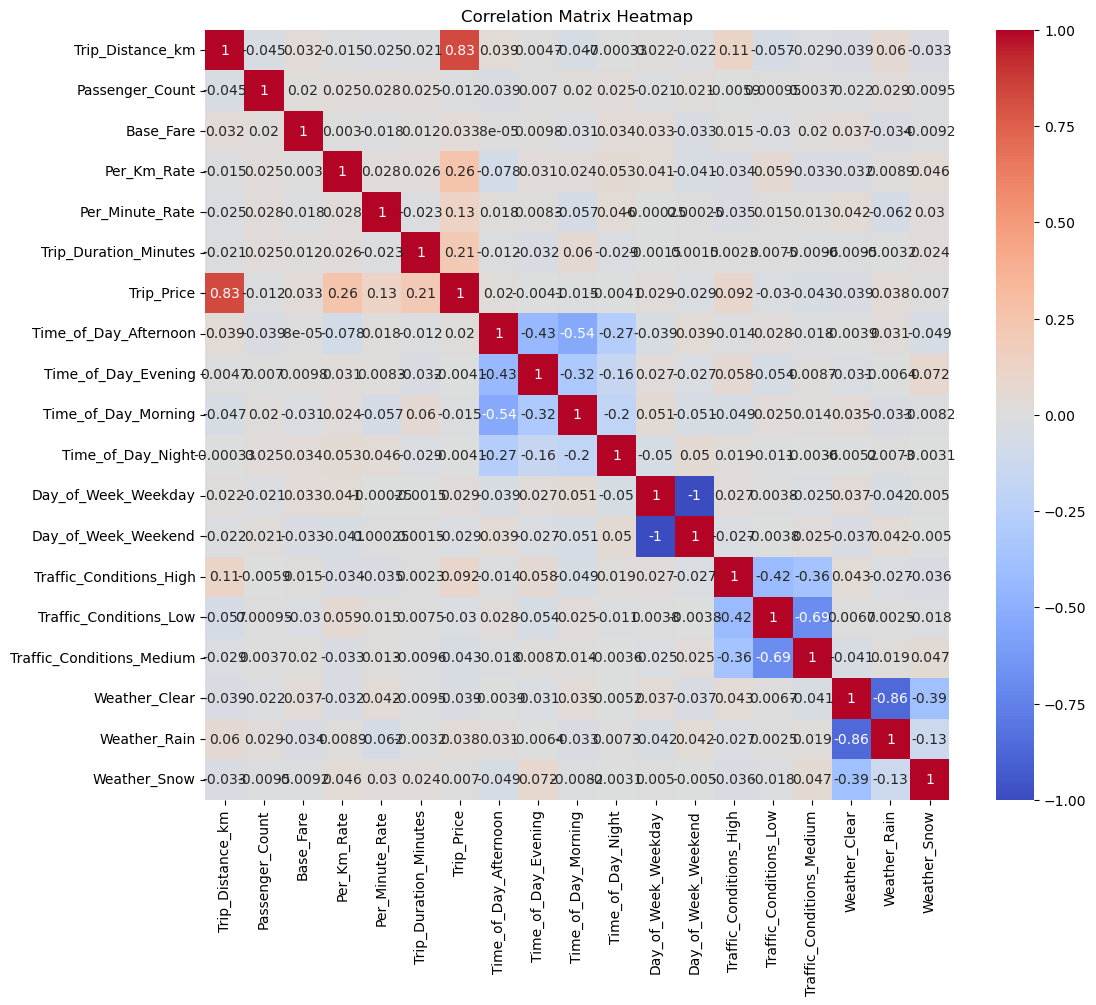

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

## scatter plot to check whether regression or classification

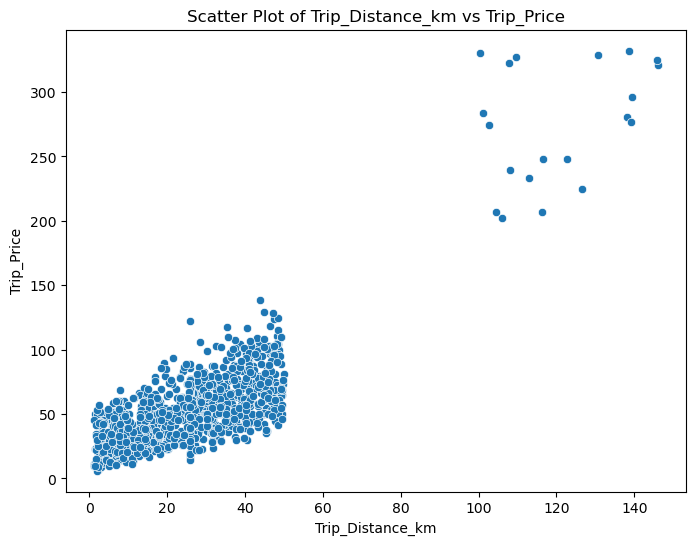

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_encoded['Trip_Distance_km'], y=df_encoded['Trip_Price'])
plt.title('Scatter Plot of Trip_Distance_km vs Trip_Price')
plt.xlabel('Trip_Distance_km')
plt.ylabel('Trip_Price')
plt.show()

In [14]:
dframe = df_encoded.copy()

In [ ]:
# X = dframe.drop('Trip_Price', axis=1) 
# y = dframe['Trip_Price']  

# for column in X.columns:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=X[column], y=y)
#     plt.title(f'Scatter Plot of {column} vs Trip_Price')
#     plt.xlabel(column)
#     plt.ylabel('Trip_Price')
#     plt.show()

## Predicting Trip Prices using Linear Regression

Multiple Linear Regression MSE: 192.1175927448288
Multiple Linear Regression R2 Score: 0.768733324226107


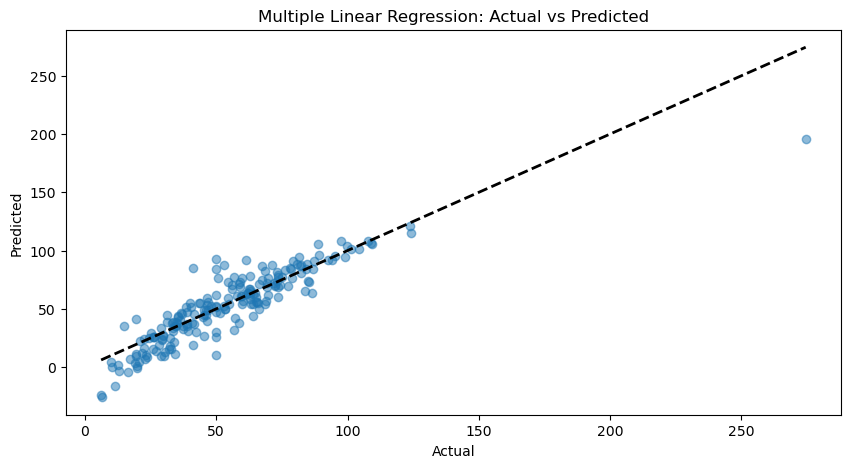

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dframe.drop('Trip_Price', axis=1)  
y = dframe['Trip_Price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)  


y_pred_linear = linear_reg.predict(X_test) 


mse_linear = mean_squared_error(y_test, y_pred_linear)  
r2_linear = r2_score(y_test, y_pred_linear)  

print(f"Multiple Linear Regression MSE: {mse_linear}")
print(f"Multiple Linear Regression R2 Score: {r2_linear}")


plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()